## Geneformer Fine-Tuning for Classification of Dosage-Sensitive vs. -Insensitive Transcription Factors (TFs)

### Please note that, as usual with deep learning models, we **highly** recommend tuning learning hyperparameters for all fine-tuning applications as this can significantly improve model performance. Example below uses default hyperparameters, but please see the "hyperparam_optimiz_for_disease_classifier" script for an example of how to tune hyperparameters for downstream applications.

### Train gene classifier with 5-fold cross-validation:

In [1]:
import sys
if '/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer' not in sys.path:
    sys.path.append('/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer')

In [2]:
import datetime
import pickle
from geneformer import Classifier

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"

output_prefix = "tf_dosage_sens_test"
output_dir = f"/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/output_directory_gene_class_pancreas/{datestamp}"
!mkdir $output_dir

/part-vol-2/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/blob/main/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle
with open("/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle", "rb") as fp:
    gene_class_dict = pickle.load(fp)

In [4]:
cc = Classifier(classifier="gene",
                gene_class_dict = gene_class_dict,
                max_ncells = 10_000,
                freeze_layers = 5,  # me changed to 5 from 4
                num_crossval_splits = 5, 
                forward_batch_size=64, # me changed to 64 from 200
                nproc=8)  # me changed to 8 from 18

Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


In [5]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/gene_classification/dosage_sensitive_tfs/gc-30M_sample50k.dataset
cc.prepare_data(input_data_file="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/Pancreas/data/datasets/geneformer/pancreas_scib/pancreas_scib.dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

Saving the dataset (1/1 shards): 100%|██████████| 16381/16381 [00:00<00:00, 30292.82 examples/s]


In [6]:
# 6 layer Geneformer: https://huggingface.co/ctheodoris/Geneformer/blob/main/model.safetensors
all_metrics = cc.validate(model_directory="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer",
                          prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                          id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                          output_directory=output_dir,
                          output_prefix=output_prefix)

0it [00:00, ?it/s]

****** Validation split: 1/5 ******



Map (num_proc=8): 100%|██████████| 10000/10000 [00:02<00:00, 4332.81 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
83,0.630300
166,0.561000
249,0.493800
332,0.413500
415,0.322700


100%|██████████| 157/157 [03:42<00:00,  1.42s/it]
1it [07:40, 460.48s/it]

****** Validation split: 2/5 ******



Map (num_proc=8): 100%|██████████| 10000/10000 [00:02<00:00, 4986.44 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
83,0.712200
166,0.602800
249,0.531600
332,0.429500
415,0.318000


100%|██████████| 157/157 [03:41<00:00,  1.41s/it]
2it [15:11, 454.65s/it]

****** Validation split: 3/5 ******



Map (num_proc=8): 100%|██████████| 10000/10000 [00:01<00:00, 5099.77 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
83,0.715000
166,0.609100
249,0.546100
332,0.445700
415,0.323500


100%|██████████| 157/157 [03:44<00:00,  1.43s/it]
3it [22:44, 454.03s/it]

****** Validation split: 4/5 ******



Map (num_proc=8): 100%|██████████| 10000/10000 [00:02<00:00, 4823.48 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
83,0.698600
166,0.588100
249,0.515100
332,0.414300
415,0.299600


100%|██████████| 157/157 [03:44<00:00,  1.43s/it]
4it [30:19, 454.43s/it]

****** Validation split: 5/5 ******



Map (num_proc=8): 100%|██████████| 10000/10000 [00:02<00:00, 4725.09 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
83,0.704000
166,0.595500
249,0.518200
332,0.419200
415,0.312500


100%|██████████| 157/157 [03:43<00:00,  1.43s/it]
4it [37:52, 568.19s/it]


<Figure size 1000x1000 with 0 Axes>

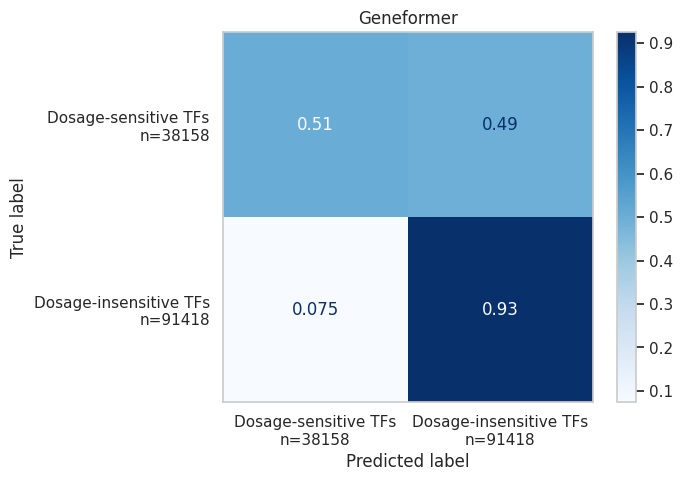

In [7]:
cc.plot_conf_mat(
    conf_mat_dict={"Geneformer": all_metrics["conf_matrix"]},
    output_directory=output_dir,
    output_prefix=output_prefix,
)

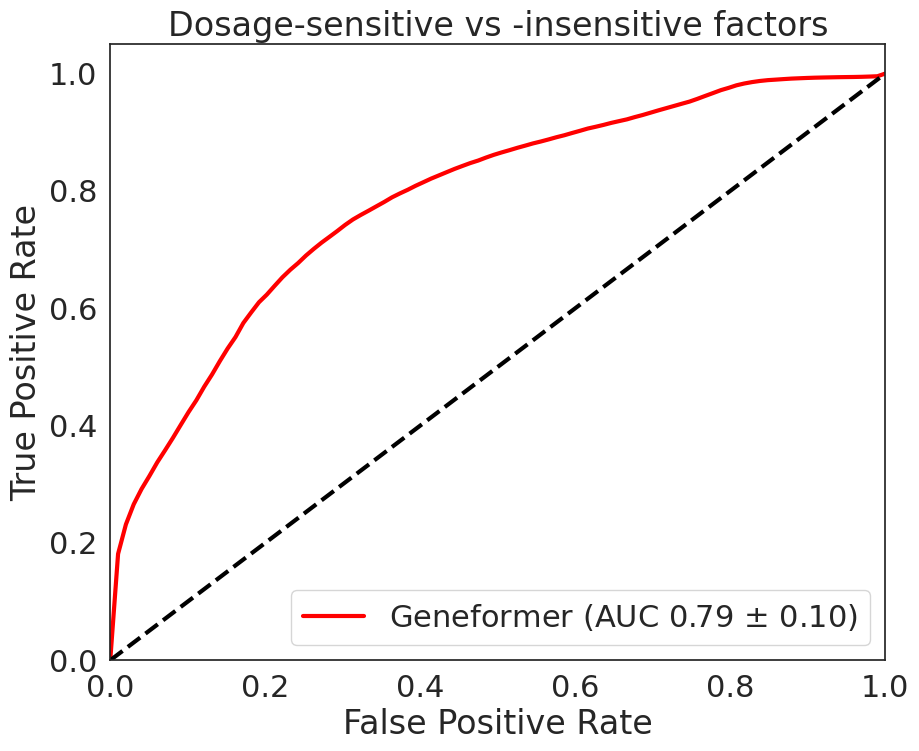

In [8]:
cc.plot_roc(
    roc_metric_dict={"Geneformer": all_metrics["all_roc_metrics"]},
    model_style_dict={"Geneformer": {"color": "red", "linestyle": "-"}},
    title="Dosage-sensitive vs -insensitive factors",
    output_directory=output_dir,
    output_prefix=output_prefix,
)

In [9]:
all_metrics

{'conf_matrix':                         Dosage-sensitive TFs  Dosage-insensitive TFs
 Dosage-sensitive TFs                 19327.0                 18831.0
 Dosage-insensitive TFs                6849.0                 84569.0,
 'macro_f1': [0.7209819690640873,
  0.7788751337375434,
  0.8643684903365283,
  0.5626465870617767,
  0.6962523432456846],
 'acc': [0.8184071320238228,
  0.8020628683693517,
  0.9030197214396254,
  0.7081590850900401,
  0.7722667638483965],
 'all_roc_metrics': {'mean_tpr': array([0.        , 0.18130065, 0.23158578, 0.26588484, 0.29190985,
         0.31403392, 0.33724091, 0.35783864, 0.37893664, 0.40105815,
         0.42293938, 0.44316834, 0.46620507, 0.48704312, 0.50989949,
         0.53151093, 0.55093731, 0.57485591, 0.59283679, 0.61023142,
         0.62324178, 0.63823349, 0.6528409 , 0.66563062, 0.67704713,
         0.68981365, 0.70118705, 0.71189475, 0.72170943, 0.731634  ,
         0.74198614, 0.75130457, 0.75902445, 0.76628757, 0.77375587,
         0.78117863

### Train gene classifier with all data:

In [10]:
import datetime
import pickle
from geneformer import Classifier

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"


output_prefix = "tf_dosage_sens_alldata"
output_dir = f"/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/output_directory_gene_class_pancreas/training_files/{datestamp}"
!mkdir $output_dir

In [11]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/blob/main/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle
with open("/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle", "rb") as fp:
    gene_class_dict = pickle.load(fp)

In [12]:
!nvidia-smi

Sun Jun  2 06:40:09 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.76                 Driver Version: 550.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     On  |   00000000:3D:00.0 Off |                  N/A |
|  0%   31C    P8              1W /  180W |    5515MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
cc = Classifier(classifier="gene",
                gene_class_dict = gene_class_dict,
                max_ncells = 10_000,
                freeze_layers = 4,
                num_crossval_splits = 0,
                forward_batch_size=32,
                nproc=8)

Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


In [14]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/gene_classification/dosage_sensitive_tfs/gc-30M_sample50k.dataset
cc.prepare_data(input_data_file="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/Pancreas/data/datasets/geneformer/pancreas_scib/pancreas_scib.dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

Saving the dataset (1/1 shards): 100%|██████████| 16381/16381 [00:00<00:00, 38084.45 examples/s]


In [15]:
# 6 layer Geneformer: https://huggingface.co/ctheodoris/Geneformer/blob/main/model.safetensors
trainer_test = cc.train_all_data(model_directory="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer",
                                 prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                                 id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                                 output_directory=output_dir,
                                 output_prefix=output_prefix)

Map (num_proc=8): 100%|██████████| 10000/10000 [00:02<00:00, 4377.84 examples/s]
mkdir: cannot create directory ‘/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/output_directory_gene_class_pancreas/training_files/240602063947/240602_geneformer_geneClassifier_tf_dosage_sens_alldata/’: File exists
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause t

Step,Training Loss
83,0.691500
166,0.578200
249,0.501300
332,0.386000
415,0.259200


In [16]:
!nvidia-smi

Sun Jun  2 06:44:36 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.76                 Driver Version: 550.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     On  |   00000000:3D:00.0 Off |                  N/A |
|  0%   58C    P2             72W /  180W |    1727MiB /  11264MiB |     93%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----